In [1]:
import pandas as pd


from utils.permuatation_test import permutation_test

THRESHOLD = 0.2
P_VALUE_THRESHOLD = 0.05


def open_df(path: str):
    return pd.read_csv(path, sep="\t", index_col=0)


def convert_signal(row):
    deviation = THRESHOLD
    significance = P_VALUE_THRESHOLD

    pvalue = row.get("fdr_bh") or row.get("pvalue")
    if pvalue < significance:
        if row["correlation"] > +deviation:
            return 1
        elif row["correlation"] < -deviation:
            return -1
    return 0

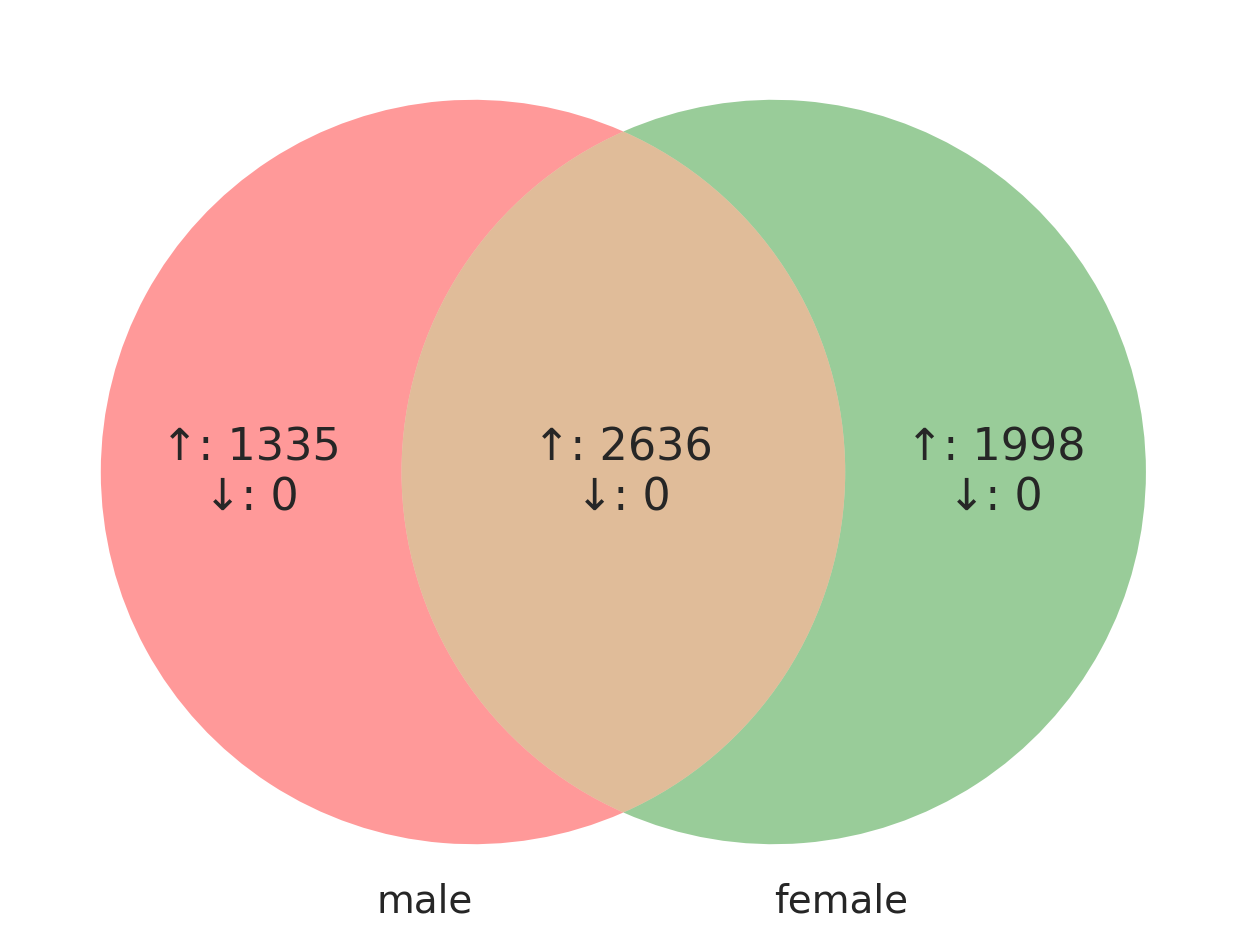

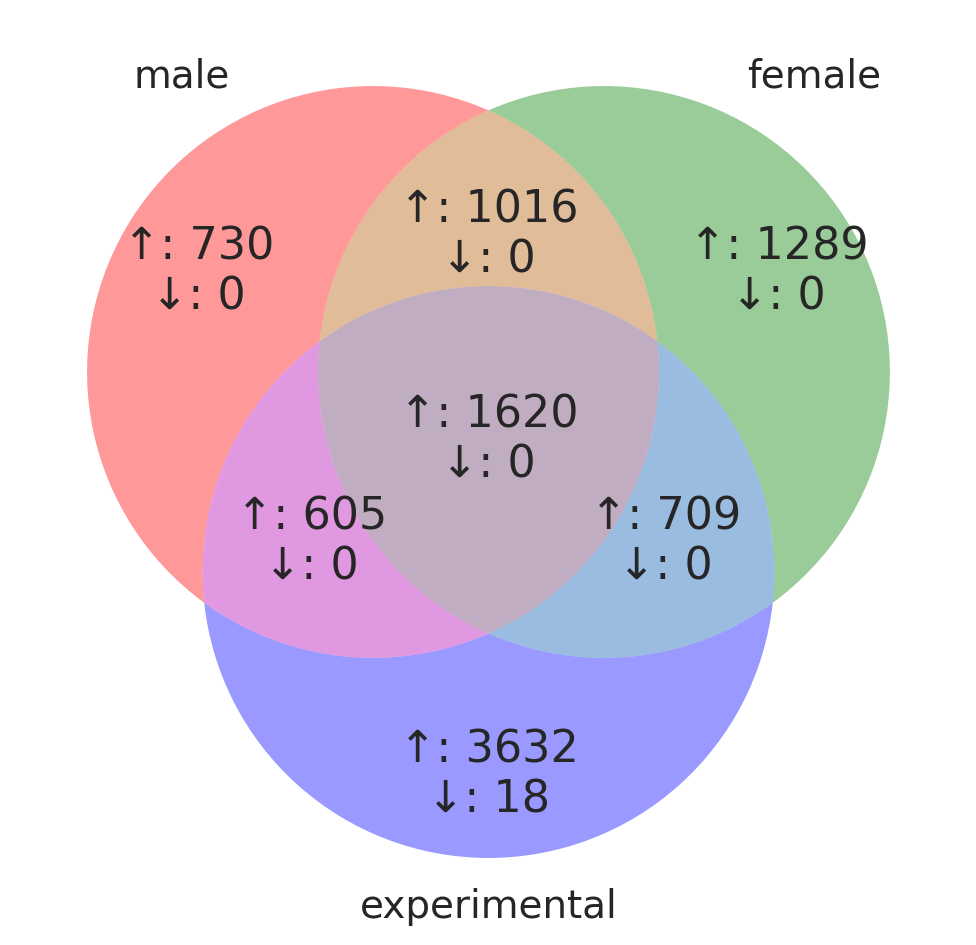

TypeError: permutation_test() got an unexpected keyword argument 'plot'

In [2]:
from utils.venn import plot_deg_venn

# CNRs
male_pancan_cnr_corrs = open_df("out/pancan/cnr_correlations(inv)_male.tsv").apply(convert_signal, axis=1)
female_pancan_cnr_corrs = open_df("out/pancan/cnr_correlations(inv)_female.tsv").apply(convert_signal, axis=1)
experimental_cnr_corrs = open_df("out/experimental/cnr_correlations(inv).tsv").apply(convert_signal, axis=1)

# tmp for p38 project
male_pancan_cnr_corrs.to_csv(
    "/home/xvvvx/oncobox/p38_signature/out/tcga_tumor_normal_match_out/cnr_correlations(inv)_male_signals.tsv",
    sep="\t"
)
female_pancan_cnr_corrs.to_csv(
    "/home/xvvvx/oncobox/p38_signature/out/tcga_tumor_normal_match_out/cnr_correlations(inv)_female_signals.tsv",
    sep="\t"
)
experimental_cnr_corrs.to_csv(
    "/home/xvvvx/oncobox/p38_signature/out/tcga_tumor_normal_match_out/cnr_correlations(inv)_exp_signals.tsv",
    sep="\t"
)

cnr_signals = pd.concat([male_pancan_cnr_corrs, female_pancan_cnr_corrs, experimental_cnr_corrs], axis=1).dropna()
cnr_signals.columns = ["male", "female", "experimental"]

plot_deg_venn(
    cnr_signals.drop(["experimental"], axis=1),
    out="plots/cnrs_male_vs_female_venn.png"
)
plot_deg_venn(cnr_signals, out="plots/cnrs_male_vs_female_vs_experimental_venn.png")

pos_cnr_intersection, _ = permutation_test(
    cnr_signals.index,
    [
        cnr_signals[cnr_signals.male == 1].index,
        cnr_signals[cnr_signals.female == 1].index,
        cnr_signals[cnr_signals.experimental == 1].index
    ],
    plot=True, group_name=f"Positive correlated CNRs intersection"
)

with open(f"out/experimental/final_cnrs_pos_corr.txt", "w") as f:
    for gene in pos_cnr_intersection:
        f.write(f"{gene}\n")

neg_cnr_intersection, _ = permutation_test(
    cnr_signals.index,
    [
        cnr_signals[cnr_signals.male == -1].index,
        cnr_signals[cnr_signals.female == -1].index,
        cnr_signals[cnr_signals.experimental == -1].index
    ],
    plot=True, group_name=f"Negative correlated CNRs intersection"
)

with open(f"out/experimental/final_cnrs_neg_corr.txt", "w") as f:
    for gene in neg_cnr_intersection:
        f.write(f"{gene}\n")

# PALs

male_pancan_pal_corrs = open_df(f"out/pancan/pal_correlations(inv)_male.tsv").apply(convert_signal, axis=1)
female_pancan_pal_corrs = open_df(f"out/pancan/pal_correlations(inv)_female.tsv").apply(convert_signal, axis=1)
experimental_pal_corrs = open_df(f"out/experimental/pal_correlations(inv).tsv").apply(convert_signal, axis=1)

pal_signals = pd.concat([male_pancan_pal_corrs, female_pancan_pal_corrs, experimental_pal_corrs], axis=1).dropna()
pal_signals.columns = ["male", "female", "experimental"]

plot_deg_venn(
    pal_signals.drop(["experimental"], axis=1),
    out="plots/pals_male_vs_female_venn.png"
)
plot_deg_venn(pal_signals, out="plots/pals_male_vs_female_vs_experimental_venn.png")

pos_pal_intersection, _ = permutation_test(
    pal_signals.index,
    [
        pal_signals[pal_signals.male == 1].index,
        pal_signals[pal_signals.female == 1].index,
        # pal_signals[pal_signals.experimental == 1].index
    ],
    plot=True, group_name=f"Positive correlated PALs intersection"
)

with open(f"out/experimental/final_pals_pos_corr.txt", "w") as f:
    for pathway in pos_pal_intersection:
        f.write(f"{pathway}\n")

neg_pal_intersection, _ = permutation_test(
    pal_signals.index,
    [
        pal_signals[pal_signals.male == -1].index,
        pal_signals[pal_signals.female == -1].index,
        pal_signals[pal_signals.experimental == -1].index
    ],
    plot=True, group_name=f"Negative correlated PALs intersection"
)

with open(f"out/experimental/final_pals_neg_corr.txt", "w") as f:
    for pathway in neg_pal_intersection:
        f.write(f"{pathway}\n")